# Predict House Price with simple linear regression 

##### In this project We want make a model for predict house price on house-price.csv dataset .

### Step 1 (Install pakages for project)

In [ ]:
!pip install numpy

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install seaborn

### Step 2 (Call pakages)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

### Step 3 (Read and work on data)

##### File format is csv !!!

In [2]:
df = pd.read_csv("house_price_2022.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [4]:
# WE HAVE MISSING VALUES IN ADDRESS COLUMN >> 0.6 %  
# WE DELETE ALL ROWS WITH MISSING ADDRESS DATA
df = df.dropna()
df = df.reset_index(drop=True)

In [5]:
# WE HAVE 3 COLUMNS WITH BOOL TYPE (True, False) >> WE HAVE TO CHANGE THOSE TO 0 AND 1 FOR REGRESSION
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# You can select witch ways that you want
df["Parking"] = encoder.fit_transform(df["Parking"])

Warehouse = encoder.fit(df["Warehouse"])
df["Warehouse"] = Warehouse.transform(df["Warehouse"])

df["Address"] = encoder.fit_transform(df["Address"])

df.Elevator = encoder.fit_transform(df.Elevator)

In [6]:
# CHANGE OBJECT TO FLOAT
# WE HAVE PROBLEM FIRST FIX IT
df = df[pd.to_numeric(df["Area"], errors="coerce").notnull()]

In [7]:
df["Area"] = df["Area"].astype("int")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3450 entries, 0 to 3455
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   int64  
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   int64  
 3   Warehouse   3450 non-null   int64  
 4   Elevator    3450 non-null   int64  
 5   Address     3450 non-null   int64  
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 242.6 KB


### Step 4 (Select two columns for Linear Regression)

<Axes: >

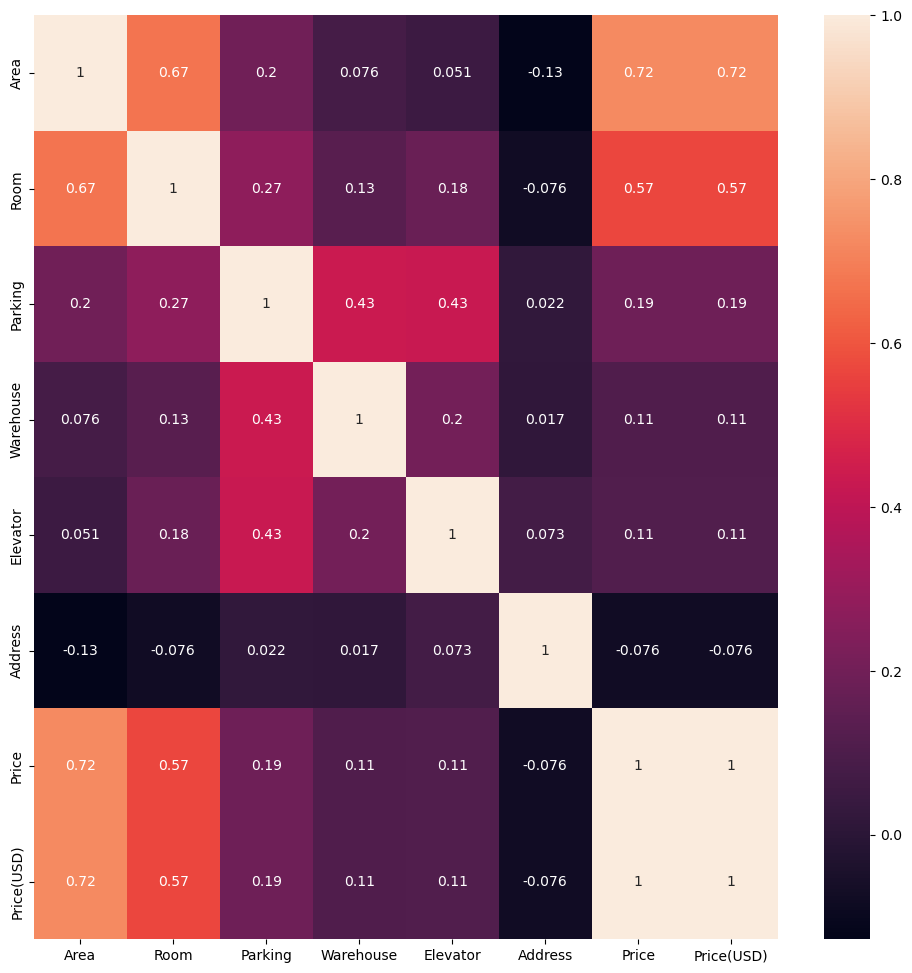

In [9]:
corr = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True)

In [10]:
# WE SELECT AREA FOR X AND PRICE FOR Y

X_Area = df[["Area"]]

y = df[["Price"]]


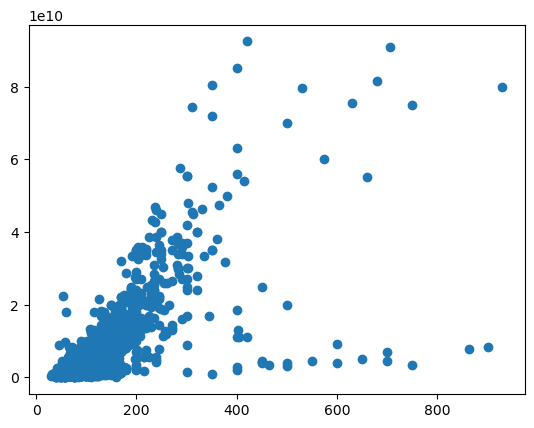

In [11]:
# PLOT WITH X_Area

plt.scatter(X_Area, y)

### Step 5 (Rmove bad data)

In [12]:
# FIND BAD DATA
bad_data = ~((df["Area"] >= 300) & (df["Price"] <=2e10) | 
             (df["Area"].between(300, 450)) & (df["Price"] >=8e10) |
             (df["Area"] >=0) & (df["Price"] <= 10) 
            )
df = df[bad_data].reset_index(drop=True)         

### Step 6 (Change X,y and make train,test data)

In [13]:
from sklearn.model_selection import train_test_split

X_Area_new = df[["Area"]].values
y_new = df[["Price"]].values

x_train, x_test, y_train, y_test = train_test_split(X_Area_new, y_new, test_size=0.2, random_state=0)

### Step 7 (Make model and fit data)

In [14]:
model = sklearn.linear_model.LinearRegression()

In [15]:
model.fit(x_train, y_train)

LinearRegression()

In [16]:
y_predict = model.predict(x_test)
yhat = model.intercept_ + (x_train * model.coef_)

### Step 8 (Evaluate and draw the predict line)

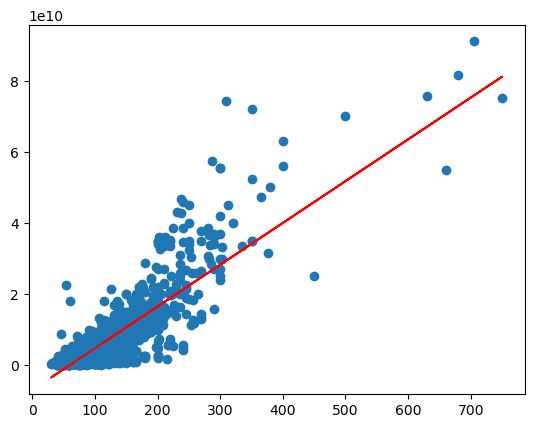

In [17]:
plt.scatter(x_train, y_train)
plt.plot(x_train, yhat, "r")

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f"mean_absolute_error = {mean_absolute_error(y_test, y_predict)}")
print(f"mean_squared_error = {mean_squared_error(y_test, y_predict)}")
print(f"R 2 score train = {r2_score(y_train, yhat)}")
print(f"R 2 score test = {r2_score(y_test, y_predict)}") 
 

mean_absolute_error = 2383299997.666617
mean_squared_error = 1.3455464179138515e+19
R 2 score train = 0.72868648111735
R 2 score test = 0.7899504162137857


# Predict house price with multiple regression

#### In this method we can use all of columns not two of those

In [19]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,156,1.850000e+09,61666.67
1,60,1,1,1,1,156,1.850000e+09,61666.67
2,79,2,1,1,1,117,5.500000e+08,18333.33
3,95,2,1,1,1,152,9.025000e+08,30083.33
4,123,2,1,1,1,150,7.000000e+09,233333.33


### Step 1 (Make new train and test)

In [20]:
X = df.iloc[:, 0:6]
y = df.iloc[:, -2]


In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Step 2 (Make multiple model and fit data)

In [22]:
from sklearn.linear_model import LinearRegression

model_multi = LinearRegression()  

In [23]:
model.fit(x_train, y_train)

LinearRegression()

### Step 3 (Evaluation)

In [24]:
yhat = model.predict(x_test)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f"mean_absolute_error = {mean_absolute_error(y_test, y_predict)}")
print(f"mean_squared_error = {mean_squared_error(y_test, y_predict)}")
print(f"R 2 score test = {r2_score(y_test, yhat)}")

mean_absolute_error = 2383299997.666617
mean_squared_error = 1.3455464179138515e+19
R 2 score test = 0.7905950564793383
